## Classification of functional and non-functional software requirements using the followig algorithms:
    1. Logistic Regression
    2. Support Vector Machine
    3. Decision Tree
    4. Random Forest

#### Importing modules

In [31]:
import csv
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#### Read the CSV file and drop any columns with missing values

In [32]:
df = pd.read_csv("extended.csv")
df = df.dropna(axis=1, how='any')
df.tail()

,Type,Requirement
972,FR,There will be a designated phone number that u...
973,FR,Texts sent to that number will be sent to the ...
974,FR,"If a question is not understood by our API, th..."
975,FR,Upon the USB being plugged in the system shall...
976,FR,The system shall be able to handle 1000 custom...


#### Create a new column called 'Tag' that has a value of 1 for 'F' and 'FR' in the 'Type' column and 0 otherwise

In [33]:
df["Tag"] = df.apply(lambda x: 1 if x["Type"] in ['F', 'FR'] else 0, axis=1)
df.head()

,Type,Requirement,Tag
0,PE,The system shall refresh the display every 60 ...,0
1,LF,The application shall match the color of the s...,0
2,US,If projected the data must be readable. On ...,0
3,A,The product shall be available during normal ...,0
4,US,If projected the data must be understandable...,0


#### Split the data into training and test sets

In [34]:
X = df["Requirement"]
y = df["Tag"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Vectorize the text data

In [35]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

#### Transform the vectorized data using TF-IDF

In [36]:
transformer = TfidfTransformer()
X_train_tfidf = transformer.fit_transform(X_train_counts)
X_test_tfidf = transformer.transform(X_test_counts)

#### Define the models to be trained

In [37]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': svm.SVC(kernel="linear"),
    'Decision Tree': tree.DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

#### Function to train and evaluate the models

In [38]:
def run_algorithms(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        scores[name] = model.score(x_test, y_test)
    return scores

#### Train and evaluate the models

In [39]:
scores = run_algorithms(models, X_train_tfidf, X_test_tfidf, y_train, y_test)
scores

{'Logistic Regression': 0.8673469387755102,
 'Support Vector Machine': 0.8724489795918368,
 'Decision Tree': 0.7244897959183674,
 'Random Forest': 0.8469387755102041}

#### Visualizing the accuracy of the algorithms

In [40]:
import matplotlib.pyplot as plt

# Extract the list of algorithm names and scores
algorithms = list(scores.keys())
accuracies = list(scores.values())

In [41]:
# getting the index of the algorithm with highest accuracy
max_algorithm = max(scores, key=scores.get)
colors = ['grey' for _ in range(len(algorithms))]
max_index = algorithms.index(max_algorithm)

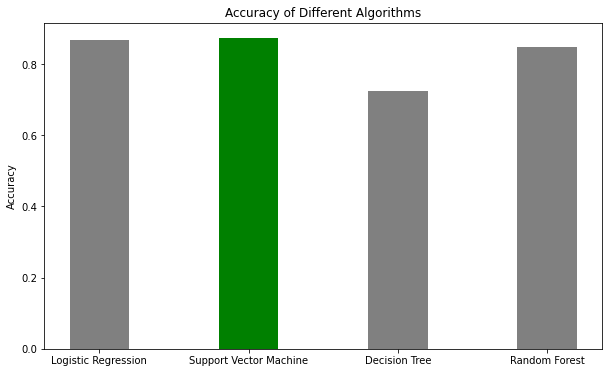

In [42]:
# Visualizing the accuracy of the algorithms (green shows the algorithm with the highest accuracy)
plt.figure(figsize=(10, 6))
colors[max_index] = 'green'
plt.bar(algorithms, accuracies, width=0.4, color=colors)
plt.xticks(algorithms)
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.show()

#### Enter a string to classify

In [50]:
from sklearn.metrics.pairwise import cosine_similarity

In [69]:
def classify_requirement(models, vectorizer, transformer, requirement, combined_tfidf):
    # Preprocess the requirement string
    requirement_counts = vectorizer.transform([requirement])
    requirement_tfidf = transformer.transform(requirement_counts)
    
    # Calculate cosine similarity between requirement and all software requirements
    similarity = cosine_similarity(combined_tfidf, requirement_tfidf)
    
    if similarity > 0.1:
        # Predict the requirement class using each model
        classes = []
        for name, model in models.items():
            pred_class = model.predict(requirement_tfidf)[0]
            classes.append((name, 'Functional' if pred_class == 1 else 'Non-Functional'))

        return classes
    else:
        return "Not a Software Requirement"

In [70]:
combined_requirements = ' '.join(df['Requirement'])
combined_counts = vectorizer.transform([combined_requirements])
combined_tfidf = transformer.transform(combined_counts)

#### Enter a string to search if it is a functional or non-functional requirement

In [74]:
custom_string = 'The system should be able to handle 1000 requests per second.'
classes = classify_requirement(models, vectorizer, transformer, custom_string, combined_tfidf)
print(classes)

[('Logistic Regression', 'Non-Functional'), ('Support Vector Machine', 'Functional'), ('Decision Tree', 'Non-Functional'), ('Random Forest', 'Non-Functional')]
